In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
#Lets get some of my favourite yt channel ids 
api_key = '##############################'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww'  # Tina Huang  
              ] 

youtube = build('youtube','v3',developerKey = api_key)

## Function to get Channel Statistics

In [3]:
#Now get the channel statistics using Youtube API

def get_channel_stats(youtube , channel_ids):
    all_data = []
    request = youtube.channels().list(part='snippet,contentDetails,statistics',id = ','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):    
        data = dict(Channel_Name = response['items'][i]['snippet']['title'],
               Subscribers = response['items'][i]['statistics']['subscriberCount'],
               Views = response['items'][i]['statistics']['viewCount'],
               Total_Videos = response['items'][i]['statistics']['videoCount'],
               Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
        
    
    return all_data

In [4]:
Channel_stats = get_channel_stats(youtube,channel_ids)

In [5]:
Channel_stats

[{'Channel_Name': 'Ken Jee',
  'Subscribers': '169000',
  'Views': '4980233',
  'Total_Videos': '210',
  'Playlist_id': 'UUiT9RITQ9PW6BhXK0y2jaeg'},
 {'Channel_Name': 'Luke Barousse',
  'Subscribers': '98300',
  'Views': '4554393',
  'Total_Videos': '52',
  'Playlist_id': 'UULLw7jmFsvfIVaUFsLs8mlQ'},
 {'Channel_Name': 'techTFQ',
  'Subscribers': '10700',
  'Views': '413993',
  'Total_Videos': '39',
  'Playlist_id': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel_Name': 'Alex The Analyst',
  'Subscribers': '131000',
  'Views': '4778356',
  'Total_Videos': '116',
  'Playlist_id': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel_Name': 'Tina Huang',
  'Subscribers': '178000',
  'Views': '5591142',
  'Total_Videos': '74',
  'Playlist_id': 'UU2UXDak6o7rBm23k3Vv5dww'}]

# Nows lets make the dataframe using pandas

In [6]:
channel_data = pd.DataFrame(data = Channel_stats)

In [7]:
channel_data

,Channel_Name,Subscribers,Views,Total_Videos,Playlist_id
0,Ken Jee,169000,4980233,210,UUiT9RITQ9PW6BhXK0y2jaeg
1,Luke Barousse,98300,4554393,52,UULLw7jmFsvfIVaUFsLs8mlQ
2,techTFQ,10700,413993,39,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,131000,4778356,116,UU7cs8q-gJRlGwj4A8OmCmXg
4,Tina Huang,178000,5591142,74,UU2UXDak6o7rBm23k3Vv5dww


In [8]:
channel_data.dtypes

Channel_Name    object
Subscribers     object
Views           object
Total_Videos    object
Playlist_id     object
dtype: object

In [9]:
#Now lets change the datatypes of Subscribers,Views and Total_Videos to int
 

channel_data['Subscribers'] = channel_data['Subscribers'].astype('int64')
channel_data['Views'] = channel_data['Views'].astype('int64')
channel_data['Total_Videos'] = channel_data['Total_Videos'].astype('int64')

In [10]:
channel_data.dtypes

Channel_Name    object
Subscribers      int64
Views            int64
Total_Videos     int64
Playlist_id     object
dtype: object

# Visualization 

<AxesSubplot:xlabel='Channel_Name', ylabel='Subscribers'>

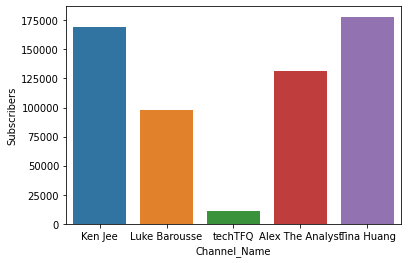

In [11]:
sns.barplot( x='Channel_Name',y='Subscribers',data=channel_data)

<AxesSubplot:xlabel='Channel_Name', ylabel='Views'>

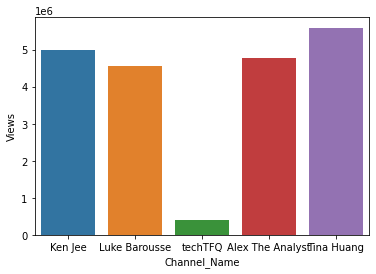

In [12]:
sns.barplot( x='Channel_Name',y='Views',data=channel_data)

<AxesSubplot:xlabel='Channel_Name', ylabel='Total_Videos'>

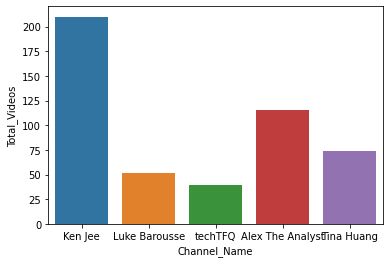

In [13]:
sns.barplot( x='Channel_Name',y='Total_Videos',data=channel_data)

# Function to get Video IDs of Alex the Analyst

In [14]:
channel_data

,Channel_Name,Subscribers,Views,Total_Videos,Playlist_id
0,Ken Jee,169000,4980233,210,UUiT9RITQ9PW6BhXK0y2jaeg
1,Luke Barousse,98300,4554393,52,UULLw7jmFsvfIVaUFsLs8mlQ
2,techTFQ,10700,413993,39,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,131000,4778356,116,UU7cs8q-gJRlGwj4A8OmCmXg
4,Tina Huang,178000,5591142,74,UU2UXDak6o7rBm23k3Vv5dww


In [15]:
#Now lets get the playlist id Of Ken Jee from the dataframe and store it in a variable 

playlist_id = channel_data.loc[channel_data['Channel_Name']=='Alex The Analyst','Playlist_id'].iloc[0]

In [16]:
playlist_id

'UU7cs8q-gJRlGwj4A8OmCmXg'

In [17]:
def get_video_ids(youtube , playlist_id):
    
    request = youtube.playlistItems().list(part='contentDetails',playlistId = playlist_id,maxResults = 50)
    response = request.execute()
    
    
    Video_ids = []
    for i in range(len(response['items'])):
        Video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(part='contentDetails',playlistId = playlist_id,maxResults = 50,pageToken = next_page_token)
            response = request.execute()
            
            for i in range(len(response['items'])):
                  Video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
           
        
    return Video_ids

In [18]:
Video_id = get_video_ids(youtube , playlist_id)

In [19]:
Video_id

['pL0jEjeM5hI',
 'eg_5EAUXs5o',
 'ebjDwX8sUMk',
 'f6qxxtWkaUg',
 '6xv1KvCMF1Q',
 '465x3JmMJYU',
 'Ns1ZpTxQnUE',
 'HiOtQMcI5wg',
 'CUa30M_FPhk',
 'DKrSgSy6F1o',
 '_zxPx1PQCqI',
 'UGF49YZZRNc',
 'aLp-6C-p-T0',
 'ocdwh0KYeUs',
 'iPYVYBtUTyE',
 'dMHWOhgzUhU',
 'A-LkxegXFX8',
 'RJw-GSXXguA',
 '8rO7ztF4NtU',
 'QILNlRvJlfQ',
 'SVv0WwPzaUg',
 'qfyynHBFOsM',
 'm1KcNV-Zhmc',
 'IZRe0nwkuXc',
 '9RRQtNnq3s0',
 'qewHAdfzLOw',
 'bHssBHfHWmU',
 'A4OVjWeVb10',
 'SIseim20_Dc',
 'NrBJmtD0kEw',
 'wnapnTAMj68',
 'duMcYRtQITA',
 'QG1fo7LFesA',
 'pYRG5X7110M',
 'NViKsiGP4TY',
 '1gdKC5O0Pwc',
 'GQj6_6V_jVA',
 'RF0LE3hYFrI',
 '8o-O6pR6yAE',
 'eFDbE5Yunj0',
 'D9bNctNnAig',
 'VsztBAEtC7c',
 'T3KMZoXrVTQ',
 'tJaDicmRW7s',
 'hfRcaRw_atI',
 'aPDOGxrONy0',
 'w25ZjL0OqT4',
 'EWPeAXrF3zg',
 'ru0Xdvxd37Q',
 'BAVPAYWAoC4',
 'whgwEwA5SHU',
 'K1WeoKxLZ5o',
 '0HRgbb1PcDQ',
 'D6XNlTfglW4',
 'MQ5UUNjWgug',
 'JikLVP9DkPs',
 'yzqpYs7dIqY',
 '7uH7_DThtX0',
 'GGLF2jLo8J4',
 'BGBXnNvWdQ4',
 'PurMLMKNX0I',
 'pvxNYyJuiqA',
 'rZpfNh

# Function to get Video Details Of Alex the Analyst

In [20]:
def get_video_details(youtube,Video_id):
    all_video_stats = []
    
    for i in range(0,len(Video_id),50):
        request = youtube.videos().list(part='snippet,statistics',id=','.join(Video_id[i:i+50]))
        response = request.execute()
        for video in response['items']:
             video_stats = dict(Title = video['snippet']['title'],
                                Published_date = video['snippet']['publishedAt'],
                                Views = video['statistics']['viewCount'],
                                Likes = video['statistics']['likeCount'],
                                Dislikes = video['statistics']['dislikeCount'],
                                Comments = video['statistics']['commentCount'])
             all_video_stats.append(video_stats)
    return all_video_stats
        

In [21]:
get_video_details(youtube,Video_id)

[{'Title': 'How to Grow Your Analytics Career | Alteryx Webinar Oct 2021 | Tips to Break Into Analytics',
  'Published_date': '2021-10-26T10:00:23Z',
  'Views': '6804',
  'Likes': '236',
  'Dislikes': '1',
  'Comments': '28'},
 {'Title': 'Choosing a Domain to Make More Money',
  'Published_date': '2021-10-19T10:00:16Z',
  'Views': '7238',
  'Likes': '430',
  'Dislikes': '3',
  'Comments': '64'},
 {'Title': 'Tableau Tutorial for Beginners | Density Maps | Bar and Line Graphs | More Visualizations | Part 3/5',
  'Published_date': '2021-10-05T11:30:14Z',
  'Views': '5975',
  'Likes': '198',
  'Dislikes': '2',
  'Comments': '34'},
 {'Title': 'Tableau Tutorial for Beginners | Calculated Fields | Bins | Part 2/5',
  'Published_date': '2021-09-28T11:30:07Z',
  'Views': '5259',
  'Likes': '212',
  'Dislikes': '3',
  'Comments': '35'},
 {'Title': 'Tableau Tutorial for Beginners | Installing Tableau | Building First Visualization | Part 1/5',
  'Published_date': '2021-09-21T11:30:01Z',
  'Views'

In [22]:
video_details = get_video_details(youtube, Video_id)

In [23]:
Video_data = pd.DataFrame(video_details)

In [24]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26T10:00:23Z,6804,236,1,28
1,Choosing a Domain to Make More Money,2021-10-19T10:00:16Z,7238,430,3,64
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05T11:30:14Z,5975,198,2,34
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28T11:30:07Z,5259,212,3,35
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21T11:30:01Z,17263,722,5,83
...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30T14:07:55Z,32725,955,3,58
112,Working at a Big Company Vs Small Company | To...,2020-01-25T16:38:39Z,6138,188,0,10
113,Data Analyst Salary | 100k with No Experience,2020-01-23T03:16:09Z,39367,1499,20,202
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21T03:52:15Z,4166,167,1,14


# Now we got the data in the data frame lets get into the data cleaning and data visulization part

In [25]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26T10:00:23Z,6804,236,1,28
1,Choosing a Domain to Make More Money,2021-10-19T10:00:16Z,7238,430,3,64
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05T11:30:14Z,5975,198,2,34
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28T11:30:07Z,5259,212,3,35
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21T11:30:01Z,17263,722,5,83
...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30T14:07:55Z,32725,955,3,58
112,Working at a Big Company Vs Small Company | To...,2020-01-25T16:38:39Z,6138,188,0,10
113,Data Analyst Salary | 100k with No Experience,2020-01-23T03:16:09Z,39367,1499,20,202
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21T03:52:15Z,4166,167,1,14


In [26]:
#Lets get the date column cleaned

Video_data['Published_date'] = pd.to_datetime(Video_data['Published_date']).dt.date

In [27]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26,6804,236,1,28
1,Choosing a Domain to Make More Money,2021-10-19,7238,430,3,64
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05,5975,198,2,34
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28,5259,212,3,35
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21,17263,722,5,83
...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,32725,955,3,58
112,Working at a Big Company Vs Small Company | To...,2020-01-25,6138,188,0,10
113,Data Analyst Salary | 100k with No Experience,2020-01-23,39367,1499,20,202
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21,4166,167,1,14


In [28]:
#now lets see the data types

Video_data.dtypes

Title             object
Published_date    object
Views             object
Likes             object
Dislikes          object
Comments          object
dtype: object

In [29]:
# Seems like we need to change the data types tooo for the visualization

Video_data['Views'] = Video_data['Views'].astype('int64')
Video_data['Likes'] = Video_data['Likes'].astype('int64')
Video_data['Dislikes'] = Video_data['Dislikes'].astype('int64')
Video_data['Comments'] = Video_data['Comments'].astype('int64')


In [30]:
Video_data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Dislikes           int64
Comments           int64
dtype: object

In [33]:
# Now lets do some analysis 
# Nows lets have a look at the top 10 Videos of Alex the Analyst


top10_videos = Video_data.sort_values(by=['Views'],ascending = False)[:10]

In [34]:
top10_videos

,Title,Published_date,Views,Likes,Dislikes,Comments
79,Top 5 Reasons Not to Become a Data Analyst,2020-08-12,429562,9684,416,794
87,Data Scientist vs Data Analyst | Which Is Righ...,2020-06-10,404032,13367,110,654
84,Data Analyst vs Business Analyst | Which Is Ri...,2020-07-03,332523,9224,78,452
21,Data Analyst Portfolio Project | SQL Data Expl...,2021-05-04,225612,6575,45,848
81,What Does a Data Analyst Actually Do?,2020-07-29,215613,5198,89,262
30,Google Data Analytics Professional Certificate...,2021-03-12,209126,7422,84,1020
73,How I Changed Careers to Become a Data Analyst...,2020-09-10,189499,6264,86,2268
104,SQL Basics Tutorial For Beginners | Installing...,2020-03-01,132766,2526,31,230
15,How To Get a Data Analyst Job (with No Experie...,2021-06-08,132016,7012,41,392
12,Why You Need to Stop Taking Courses (From an E...,2021-07-13,116330,5032,82,356


<AxesSubplot:xlabel='Views', ylabel='Title'>

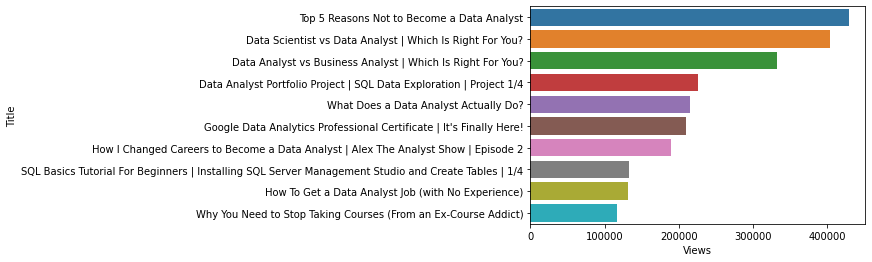

In [40]:
#Now the data is cleaned and letss do the visulization part

sns.barplot(x="Views",y="Title",data=top10_videos)

In [41]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26,6804,236,1,28
1,Choosing a Domain to Make More Money,2021-10-19,7238,430,3,64
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05,5975,198,2,34
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28,5259,212,3,35
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21,17263,722,5,83
...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,32725,955,3,58
112,Working at a Big Company Vs Small Company | To...,2020-01-25,6138,188,0,10
113,Data Analyst Salary | 100k with No Experience,2020-01-23,39367,1499,20,202
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21,4166,167,1,14


In [42]:
Video_data['Month'] = pd.to_datetime(Video_data['Published_date']).dt.strftime('%b')

In [43]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments,Month
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26,6804,236,1,28,Oct
1,Choosing a Domain to Make More Money,2021-10-19,7238,430,3,64,Oct
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05,5975,198,2,34,Oct
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28,5259,212,3,35,Sep
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21,17263,722,5,83,Sep
...,...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,32725,955,3,58,Jan
112,Working at a Big Company Vs Small Company | To...,2020-01-25,6138,188,0,10,Jan
113,Data Analyst Salary | 100k with No Experience,2020-01-23,39367,1499,20,202,Jan
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21,4166,167,1,14,Jan


In [50]:
#Nows lets get group the data by monthly basis

videos_per_month = Video_data.groupby(by='Month',as_index = False).size()

In [51]:
videos_per_month

,Month,size
0,Apr,8
1,Aug,9
2,Dec,9
3,Feb,11
4,Jan,12
5,Jul,6
6,Jun,9
7,Mar,14
8,May,9
9,Nov,8


In [52]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [55]:
videos_per_month = videos_per_month.sort_index()

<AxesSubplot:xlabel='Month', ylabel='size'>

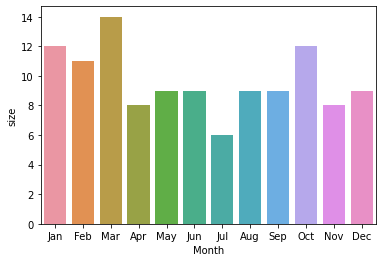

In [57]:
sns.barplot(x='Month', y='size', data=videos_per_month)

In [58]:
# Now we can see Alex The Analyst Uploaded more videos in the month of march in the above Visualization

In [59]:
Video_data

,Title,Published_date,Views,Likes,Dislikes,Comments,Month
0,How to Grow Your Analytics Career | Alteryx We...,2021-10-26,6804,236,1,28,Oct
1,Choosing a Domain to Make More Money,2021-10-19,7238,430,3,64,Oct
2,Tableau Tutorial for Beginners | Density Maps ...,2021-10-05,5975,198,2,34,Oct
3,Tableau Tutorial for Beginners | Calculated Fi...,2021-09-28,5259,212,3,35,Sep
4,Tableau Tutorial for Beginners | Installing Ta...,2021-09-21,17263,722,5,83,Sep
...,...,...,...,...,...,...,...
111,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,32725,955,3,58,Jan
112,Working at a Big Company Vs Small Company | To...,2020-01-25,6138,188,0,10,Jan
113,Data Analyst Salary | 100k with No Experience,2020-01-23,39367,1499,20,202,Jan
114,Truth About Big Companies | Told by a Fortune ...,2020-01-21,4166,167,1,14,Jan


In [64]:
#now lets export the data 

Video_data.to_csv('Video_details(AlexTheAnalyst).csv')